In [76]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier


In [108]:
df = pd.read_csv('../googleplaystore.csv')

print(df.shape)
df.head()


(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


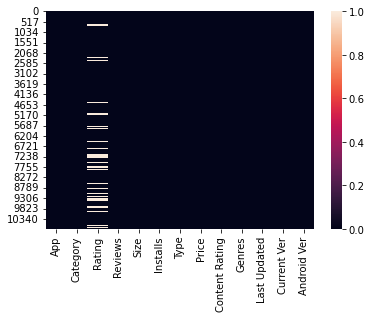

In [109]:
sns.heatmap(df.isna())
plt.show()

In [110]:
df = df.dropna()
# sns.heatmap(df.isna())
# plt.show()

<AxesSubplot:>

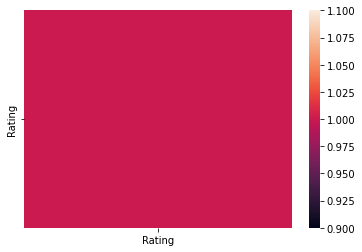

In [111]:
sns.heatmap(df.corr())

In [90]:
feature_columns, marker_column = ['Size', 'Reviews', "Price", "Installs"], ["Rating"]
relevant_data = df[feature_columns + marker_column]
# relevant_data.dropna(inplace = True)
#relevant_data.head()

#drop row with shuffled columns
relevant_data.drop(
    relevant_data[relevant_data['Installs'].str.contains("Free")].index,
    axis = 0,
    inplace = True) 

#replacing $ in price
relevant_data['Price'].replace(
    {r'\$([0-9]*\.*[0-9]*)': r'\1'},
    inplace = True,
    regex = True)

#replacing , in installs
relevant_data['Installs'].replace(
    {r'([0-9]*)\,*([0-9]*)\,*([0-9]*)\,*([0-9]*)\+': r'\1\2\3\4'},
    inplace = True,
    regex = True)

# #replacing M, k (megabytes, kilobytes in size), result will be in kilobytes ? need to think this over
# relevant_data['Size'].replace(
#     {
# #         r'([0-9]*\.*[0-9]*)M': r'\1',
# #         r'([0-9]*\.*[0-9]*)k': r'\1',
#         r'([0-9]*)\.([0-9]*)M': r'\g<1>\g<2>000',
#         r'([0-9]*)\.([0-9]*)k': r'\g<1>\g<2>',
#     },
#     inplace = True,
#     regex = True)

def remove_MB_KB(x):
    val = 0
    if(x[-1] == 'M'):
        val = float(x[:-1])*1000
    elif(x[-1] == 'k'):
        val = float(x[:-1])
    return val

relevant_data.Size = relevant_data.Size.map(remove_MB_KB)

# relevant_data['Size'].replace(
#     {
#         r'([0-9]*\.*[0-9]*)M': r'\1',
#         r'([0-9]*\.*[0-9]*)k': r'\1',
#     },
#     inplace = True,
#     regex = True)


relevant_data.drop(relevant_data[pd.to_numeric(relevant_data.Size, errors = 'coerce').isnull()].index,
                  axis = 0,
                  inplace = True)

#spliting viewer sympathy in 2 classes by rating
relevant_data.Rating = relevant_data.Rating.map(lambda x: 1 if x>=4.0 else 0)

relevant_data = relevant_data.apply(pd.to_numeric)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [91]:
# after preprocessing dataset
print(relevant_data.shape)
relevant_data.head()
list(relevant_data.columns.values.tolist())

(9360, 5)


['Size', 'Reviews', 'Price', 'Installs', 'Rating']

In [8]:
# relevant_data.describe()

In [9]:
# relevant_data['Price'].value_counts()

In [10]:
# relevant_data['Reviews'].value_counts()

In [34]:
relevant_data['Rating'].value_counts()

1    4111
0    3612
Name: Rating, dtype: int64

<AxesSubplot:>

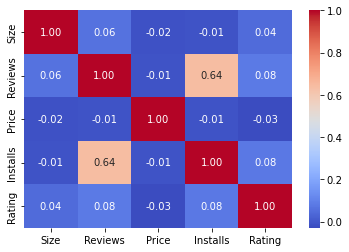

In [113]:
sns.heatmap(relevant_data.corr(), cmap='coolwarm', annot=True, fmt=".2f")

In [13]:
# for title in relevant_data.columns.values.tolist()[:-1]:
#     sns.displot(relevant_data, x=title)

In [14]:
# for title in relevant_data.columns.values.tolist()[:-1] :
#     fig = plt.figure()
#     ax = sns.boxplot(x="Rating", y=title, data=relevant_data)

In [92]:
# relevant_data = pd.DataFrame(StandardScaler().fit_transform(relevant_data))
# relevant_data.head()
y = relevant_data['Rating']
X = relevant_data.drop(['Rating'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [104]:
# model = DecisionTreeClassifier(criterion='entropy')
model = DecisionTreeClassifier(criterion='entropy', max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.24      0.02      0.04       985
           1       0.79      0.98      0.88      3695

    accuracy                           0.78      4680
   macro avg       0.52      0.50      0.46      4680
weighted avg       0.68      0.78      0.70      4680

[[  19  966]
 [  59 3636]]


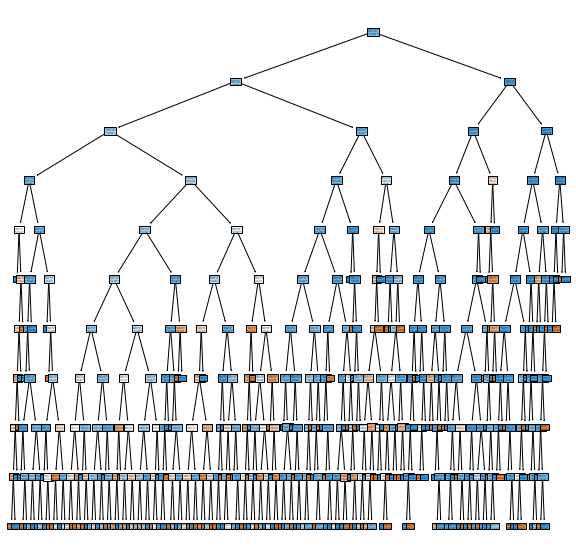

In [105]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
plt.figure(figsize = (10, 10))
plot_tree(model, feature_names = list(relevant_data.columns.values.tolist()), 
          class_names = ["Good", "Bad"], filled = True)
plt.show()

In [74]:
knn = KNeighborsClassifier(n_neighbors=13, algorithm='brute',
                           metric='minkowski', weights='uniform',
                          leaf_size=50)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       517
           1       0.87      1.00      0.93      3345

    accuracy                           0.87      3862
   macro avg       0.43      0.50      0.46      3862
weighted avg       0.75      0.87      0.80      3862

[[   0  517]
 [   0 3345]]


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train,y_train)
print("optimal params according to SVC: ", grid.best_estimator_)

grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

optimal params according to SVC:  SVC(C=1000, gamma=0.01)
[[   7  978]
 [   7 3688]]
              precision    recall  f1-score   support

           0       0.50      0.01      0.01       985
           1       0.79      1.00      0.88      3695

    accuracy                           0.79      4680
   macro avg       0.65      0.50      0.45      4680
weighted avg       0.73      0.79      0.70      4680



In [100]:
# forest_model = RandomForestClassifier(criterion='gini',  #mera neodnorodnosti
#                                 n_estimators=25,         #amount of trees to use
#                                 bootstrap = True,        #build random forest using bootstrap samples (viborka s povtoreniami)
#                                 random_state=1,
#                                 n_jobs=2)                #parallelize computation

# forest_model.fit(X_train,y_train)
# forest_pred = forest_model.predict(X_test)
# print(confusion_matrix(y_test,forest_pred))
# print(classification_report(y_test,forest_pred))

param_rf = {'criterion':['gini', 'entropy'], 'n_estimators': [10, 15], 'max_depth':[10], 'bootstrap': [True],} 
grid = GridSearchCV(RandomForestClassifier(), param_rf, refit=True)
grid.fit(X_train,y_train)
print("optimal params according to Random Forest: ", grid.best_estimator_)


grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

optimal params according to Random Forest:  RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=15)
[[   4  981]
 [   5 3690]]
              precision    recall  f1-score   support

           0       0.44      0.00      0.01       985
           1       0.79      1.00      0.88      3695

    accuracy                           0.79      4680
   macro avg       0.62      0.50      0.45      4680
weighted avg       0.72      0.79      0.70      4680



In [95]:
parameters_ab =  { "algorithm": [ 'SAMME.R',  'SAMME'],
                    "learning_rate":[0.5,1,2],
                    "n_estimators": [150,200,300], 
                 }
grid = GridSearchCV(AdaBoostClassifier(), parameters_ab, refit=True)
grid.fit(X_train,y_train)
print("optimal params for AdaBoost: ", grid.best_estimator_)


grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))


optimal params for AdaBoost:  AdaBoostClassifier(learning_rate=0.5, n_estimators=150)
[[   3  982]
 [   1 3694]]
              precision    recall  f1-score   support

           0       0.75      0.00      0.01       985
           1       0.79      1.00      0.88      3695

    accuracy                           0.79      4680
   macro avg       0.77      0.50      0.44      4680
weighted avg       0.78      0.79      0.70      4680



In [102]:
print(y_test.value_counts())
print(len(grid_predictions[grid_predictions==0]), len(grid_predictions))

1    3695
0     985
Name: Rating, dtype: int64
9 4680
